In [1]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\being\.conda\envs\ML\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = SentenceTransformer('stsb-mpnet-base-v2')

In [3]:
testcases = pd.read_excel('.\datasets\evaluation.xlsx')
print(testcases.shape)

(9000, 3)


In [4]:
text = testcases['text'].tolist()
reason = testcases['reason'].tolist()
label = testcases['label'].tolist()
print(len(text), len(reason), len(label))

9000 9000 9000


In [5]:
# encode list of texts to get their embeddings
text_embeddings = model.encode(text, show_progress_bar=True, convert_to_tensor=True)

Batches: 100%|██████████| 282/282 [04:40<00:00,  1.00it/s]


In [6]:
# encode list of reasons to get their embeddings
reason_embeddings = model.encode(reason, show_progress_bar=True, convert_to_tensor=True)

Batches: 100%|██████████| 282/282 [01:13<00:00,  3.84it/s]


In [7]:
# compute similarity scores of two embeddings lists
cosine_scores = util.pytorch_cos_sim(text_embeddings, reason_embeddings)

In [8]:
'''# Output the pairs with their score
for i in range(len(text)):
    print("{} \t {} \t Score: {:.4f}".format(text[i], reason[i], cosine_scores[i][i]))'''

'# Output the pairs with their score\nfor i in range(len(text)):\n    print("{} \t {} \t Score: {:.4f}".format(text[i], reason[i], cosine_scores[i][i]))'

In [9]:
# convert scores to labels
pred = []
for i in range(len(text)):
    if cosine_scores[i][i] > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [10]:
# compute accuracy
correct = 0
for i in range(len(text)):
    if pred[i] == label[i]:
        correct += 1
print('Accuracy: ', correct/len(text))

Accuracy:  0.7528888888888889


In [11]:
# compute confusion matrix
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(text)):
    if pred[i] == 1 and label[i] == 1:
        tp += 1
    elif pred[i] == 0 and label[i] == 0:
        tn += 1
    elif pred[i] == 1 and label[i] == 0:
        fp += 1
    elif pred[i] == 0 and label[i] == 1:
        fn += 1
print('Confusion matrix: ', tp, tn, fp, fn)

Confusion matrix:  2294 4482 1517 707


In [12]:
# compute precision
precision = tp/(tp+fp)
print('Precision: ', tp/(tp+fp))

Precision:  0.6019417475728155


In [13]:
# compute recall
recall = tp/(tp+fn)
print('Recall: ', recall)

Recall:  0.7644118627124292


In [14]:
# compute f1 score
f1 = 2 * precision * recall / (precision + recall)
print('F1 score: ', f1)

F1 score:  0.6735173223722841


In [15]:
# compute MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(label, pred)
print('MCC: ', mcc)

MCC:  0.48807621903700127


In [16]:
# brier loss / score
from sklearn.metrics import brier_score_loss
brier = brier_score_loss(label, pred)
print('Brier loss: ', brier)

Brier loss:  0.24711111111111111


In [17]:
# brier skill score
bss = 1 - brier_score_loss(label, pred)
print('Brier skill score: ', bss)

Brier skill score:  0.7528888888888889


In [18]:
# bce loss / score
from sklearn.metrics import log_loss
bce = log_loss(label, pred)
print('BCE loss: ', bce)

BCE loss:  8.535050187953662


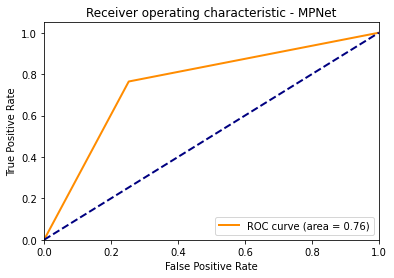

In [22]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(label, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - MPNet')
plt.legend(loc="lower right")
plt.savefig('ROC.jpeg')
plt.show()

In [20]:
# compute classification report
from sklearn.metrics import classification_report
print(classification_report(label, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80      5999
         1.0       0.60      0.76      0.67      3001

    accuracy                           0.75      9000
   macro avg       0.73      0.76      0.74      9000
weighted avg       0.78      0.75      0.76      9000

